In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### Import mechanical data ###

In [2]:
data = pd.read_csv('s0068sa03cal5_data_rp', skiprows = [1], sep = '\t') 

### Plot mechanical data vs sync ###

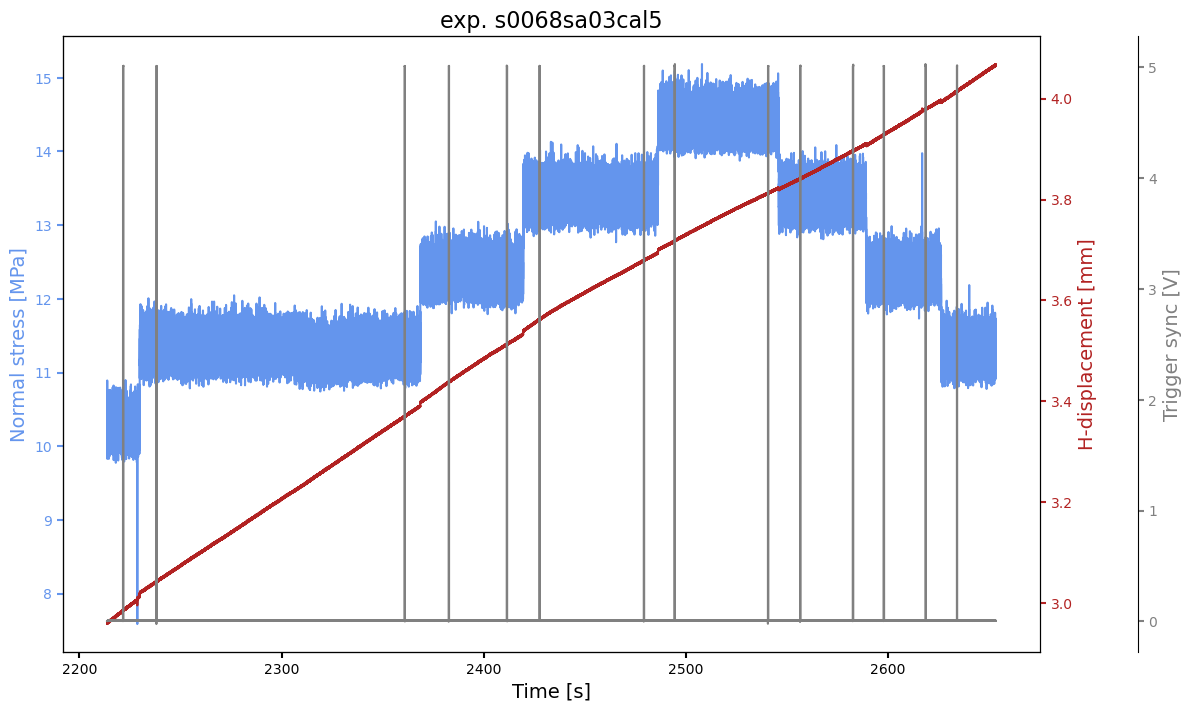

In [6]:
%matplotlib inline


### SETUP FIGURE ###
fig, ax = plt.subplots(figsize = (17,8))
fig.subplots_adjust(right=0.7)

ax.set_title('exp. s0068sa03cal5', fontsize = 16)

twin1 = ax.twinx()
twin2 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.1))


### PLOT Normal stress, H-displacement and trigger sync (Arduino pulses) ###

p1, = ax.plot(data.time_s[4400:444000],data.normal_stress_MPa[4400:444000], c = 'cornflowerblue')
p2, = twin1.plot(data.time_s[4400:444000],-data.lt_ec_mm1[4400:444000], c = 'firebrick')
p3, = twin2.plot(data.time_s[4400:444000],data.sync[4400:444000], c = 'grey')

ax.set_xlabel("Time [s]", fontsize = 14)
ax.set_ylabel("Normal stress [MPa]", fontsize = 14)
twin1.set_ylabel('H-displacement [mm]', fontsize = 14)
twin2.set_ylabel('Trigger sync [V]', fontsize = 14)

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

#plt.savefig('ns_sync_test.pdf', dpi = 300)
plt.show();



In [65]:
np.argwhere(data.sync>5)

array([[  12226],
       [  12227],
       [  12228],
       ...,
       [1083818],
       [1083819],
       [1083820]], dtype=int64)